In [ ]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
import pandas as pd

# 데이터분할
# 데이터표준화
# K최근접이웃회귀/선형회귀

df = pd.read_csv("https://bit.ly/perch_csv").to_numpy()
df

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 문제집 : 2차원 행렬
# 정답지 : 1차원 행렬

train_input, test_input, train_target, test_target = train_test_split(df, perch_weight, test_size = 0.2)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

model = LinearRegression()
model.fit(train_scaled, train_target)

LinearRegression()

In [ ]:
model.score(test_scaled, test_target)

0.9617484224057467

In [ ]:
fish = pd.read_csv("https://bit.ly/fish_csv").to_numpy()
fish

array([['Bream', 242.0, 25.4, 30.0, 11.52, 4.02],
       ['Bream', 290.0, 26.3, 31.2, 12.48, 4.3056],
       ['Bream', 340.0, 26.5, 31.1, 12.3778, 4.6961],
       ['Bream', 363.0, 29.0, 33.5, 12.73, 4.4555],
       ['Bream', 430.0, 29.0, 34.0, 12.444, 5.1339999999999995],
       ['Bream', 450.0, 29.7, 34.7, 13.6024, 4.9274],
       ['Bream', 500.0, 29.7, 34.5, 14.1795, 5.2785],
       ['Bream', 390.0, 30.0, 35.0, 12.67, 4.69],
       ['Bream', 450.0, 30.0, 35.1, 14.0049, 4.8438],
       ['Bream', 500.0, 30.7, 36.2, 14.2266, 4.9594],
       ['Bream', 475.0, 31.0, 36.2, 14.2628, 5.1042],
       ['Bream', 500.0, 31.0, 36.2, 14.3714, 4.8146],
       ['Bream', 500.0, 31.5, 36.4, 13.7592, 4.368],
       ['Bream', 340.0, 32.0, 37.3, 13.9129, 5.0728],
       ['Bream', 600.0, 32.0, 37.2, 14.9544, 5.1708],
       ['Bream', 600.0, 32.0, 37.2, 15.437999999999999, 5.58],
       ['Bream', 700.0, 33.0, 38.3, 14.8604, 5.2854],
       ['Bream', 700.0, 33.0, 38.5, 14.937999999999999, 5.1975],
       ['B

In [ ]:
fish.shape

(159, 6)

In [ ]:
data = fish[:, 1:].astype(float) # 모든 행, 1번째열부터 끝까지
target = fish[:, 0]

In [ ]:
# 가장 가까운 데이터를 5개(기본) -> 시뮬레이션 통해 최적 이웃 개수 찾기

from sklearn.neighbors import KNeighborsClassifier

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_scaled, train_target)
model.score(test_scaled, test_target)

0.8125

In [ ]:
proba = model.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.   , 0.333, 0.   , 0.333, 0.   , 0.333],
       [0.   , 0.   , 0.333, 0.   , 0.667, 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.333, 0.   , 0.667, 0.   , 0.   ]])

In [ ]:
model.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
print(len(train_scaled))
print(len(test_scaled))

127
32


In [ ]:
for n in range(1, 101):
  model = KNeighborsClassifier(n_neighbors = n)
  model.fit(train_scaled, train_target)
  score = model.score(test_scaled, test_target)
  print(n, score)

1 0.71875
2 0.6875
3 0.78125
4 0.75
5 0.78125
6 0.75
7 0.75
8 0.75
9 0.75
10 0.75
11 0.6875
12 0.6875
13 0.6875
14 0.625
15 0.65625
16 0.625
17 0.625
18 0.625
19 0.625
20 0.625
21 0.5625
22 0.5625
23 0.5625
24 0.5625
25 0.5625
26 0.53125
27 0.53125
28 0.53125
29 0.5
30 0.46875
31 0.46875
32 0.46875
33 0.4375
34 0.4375
35 0.40625
36 0.40625
37 0.40625
38 0.40625
39 0.40625
40 0.40625
41 0.40625
42 0.40625
43 0.40625
44 0.40625
45 0.40625
46 0.40625
47 0.40625
48 0.40625
49 0.40625
50 0.40625
51 0.40625
52 0.40625
53 0.40625
54 0.40625
55 0.40625
56 0.40625
57 0.40625
58 0.40625
59 0.40625
60 0.40625
61 0.40625
62 0.40625
63 0.40625
64 0.40625
65 0.40625
66 0.40625
67 0.40625
68 0.40625
69 0.40625
70 0.40625
71 0.40625
72 0.4375
73 0.4375
74 0.40625
75 0.40625
76 0.40625
77 0.40625
78 0.40625
79 0.40625
80 0.40625
81 0.40625
82 0.40625
83 0.40625
84 0.4375
85 0.4375
86 0.46875
87 0.46875
88 0.34375
89 0.34375
90 0.34375
91 0.34375
92 0.34375
93 0.34375
94 0.34375
95 0.34375
96 0.34375
97

In [ ]:
test_target[:10]

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Perch', 'Perch', 'Pike',
       'Pike', 'Pike', 'Smelt'], dtype=object)

In [ ]:
model.predict(test_scaled[:10])

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Perch', 'Perch', 'Pike',
       'Pike', 'Pike', 'Perch'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_scaled, train_target)
model.score(test_scaled, test_target)

0.84375

In [ ]:
test_target[:10]

array(['Whitefish', 'Perch', 'Parkki', 'Perch', 'Roach', 'Smelt',
       'Whitefish', 'Bream', 'Perch', 'Perch'], dtype=object)

In [ ]:
model.predict(test_scaled[:10])

array(['Perch', 'Perch', 'Parkki', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Bream', 'Perch', 'Perch'], dtype=object)

In [ ]:
proba = model.predict_proba(test_scaled[:10])
np.round(proba, decimals = 3)

array([[0.059, 0.075, 0.527, 0.035, 0.262, 0.003, 0.038],
       [0.006, 0.1  , 0.459, 0.019, 0.311, 0.094, 0.011],
       [0.028, 0.436, 0.186, 0.006, 0.27 , 0.063, 0.012],
       [0.003, 0.067, 0.637, 0.005, 0.238, 0.041, 0.009],
       [0.025, 0.064, 0.563, 0.021, 0.296, 0.005, 0.026],
       [0.   , 0.037, 0.097, 0.001, 0.054, 0.811, 0.001],
       [0.118, 0.003, 0.75 , 0.029, 0.023, 0.   , 0.076],
       [0.955, 0.011, 0.011, 0.003, 0.005, 0.   , 0.016],
       [0.021, 0.019, 0.705, 0.045, 0.177, 0.001, 0.031],
       [0.041, 0.048, 0.55 , 0.063, 0.259, 0.003, 0.036]])

In [ ]:
wine = pd.read_csv("https://bit.ly/wine-date").to_numpy()

# 0일때 레드와인, 1일때 화이트와인
# K최근접/로지스틱회귀

# 데이터분할
# 데이터표준화
# 모델 생성 -> 학습 -> 평가

data = wine[:, :-1]
target = wine[:, -1]

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.1)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

best = 0

for n in range(1, 101):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(train_scaled, train_target)
  score = model.score(test_scaled, test_target)
  if score > best:
    best = score
    print(n, score)

1 0.8692307692307693
5 0.8784615384615385


In [ ]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 정형 데이터 : 결정트리 < 랜덤포레스트(결정트리)(시간이 조금 더 걸림)
# 비정형 데이터 : 딥러닝

wine = wine.to_numpy()

data = wine[:, :-1]
target = wine[:, -1]

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 훈련데이터의 정확도와, 시험 데이터의 정확도

model = DecisionTreeClassifier(max_depth = 8)
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target)) # 과대, 과소

0.8953309389430477
0.8815384615384615


[Text(204.44239821593942, 212.91, 'X[1] <= 4.325\ngini = 0.369\nsamples = 5847\nvalue = [1429, 4418]'),
 Text(103.8762088432546, 203.85, 'X[1] <= 1.625\ngini = 0.482\nsamples = 3286\nvalue = [1332, 1954]'),
 Text(20.727676899944235, 194.79, 'X[1] <= 1.375\ngini = 0.189\nsamples = 1163\nvalue = [123, 1040]'),
 Text(3.680586314028519, 185.73, 'X[2] <= 3.85\ngini = 0.045\nsamples = 613\nvalue = [14, 599]'),
 Text(3.253851668923763, 176.67, 'X[1] <= 1.175\ngini = 0.035\nsamples = 610\nvalue = [11, 599]'),
 Text(1.7069385804190234, 167.60999999999999, 'X[2] <= 2.895\ngini = 0.007\nsamples = 287\nvalue = [1, 286]'),
 Text(1.2802039353142676, 158.55, 'X[0] <= 12.35\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.8534692902095117, 149.49, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(1.7069385804190234, 149.49, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(2.133673225523779, 158.55, 'gini = 0.0\nsamples = 280\nvalue = [0, 280]'),
 Text(4.800764757428503, 167.60999999999999, 'X[2]

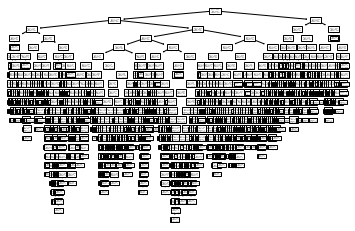

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(model)

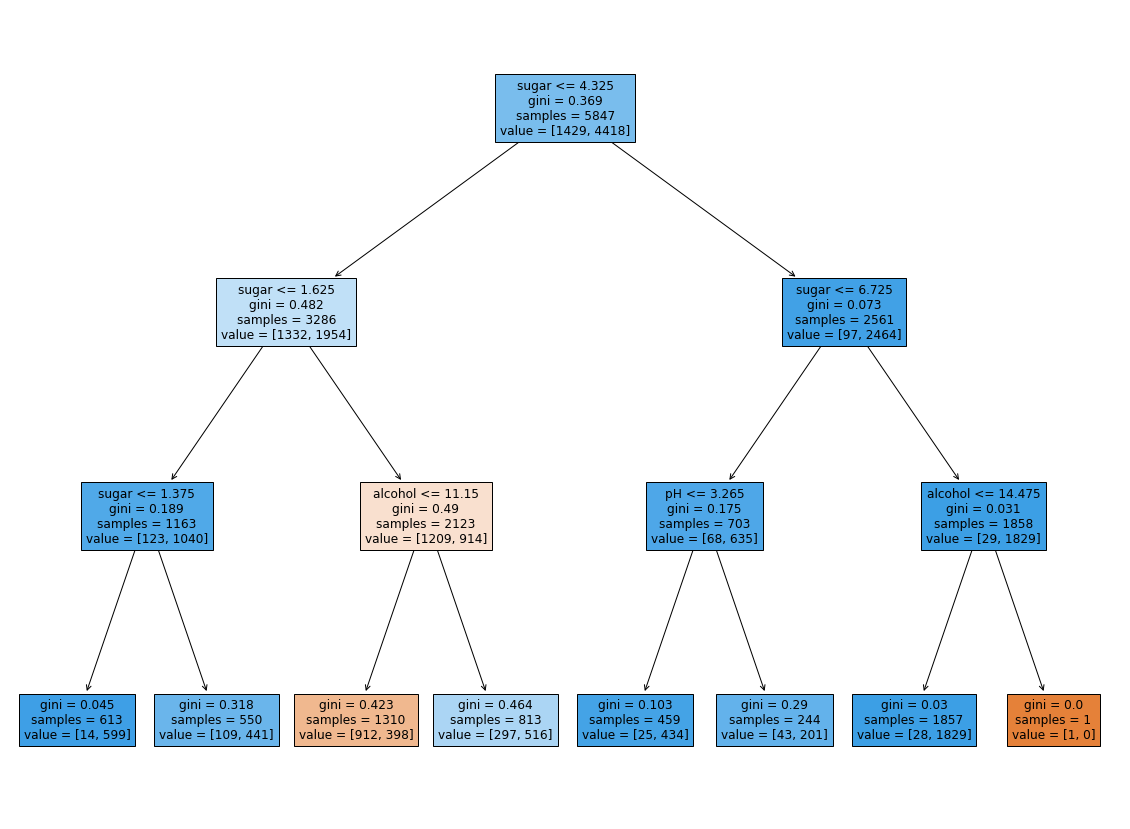

In [ ]:
plt.figure(figsize = (20, 15))
plot_tree(model, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1, oob_score=True)  
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.9969214982042073
0.9153846153846154


In [ ]:
model.oob_score_

0.8975543013511202

In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant', 'plasma', 'pressure', 'thickness',
                                                         'insulin', 'BMI', 'pedigree', 'age', 'class'])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
a = df.groupby('pregnant')['class'].mean()
a

pregnant
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: class, dtype: float64

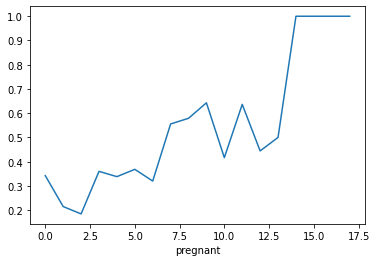

In [ ]:
a.plot()

In [ ]:
import seaborn as sns

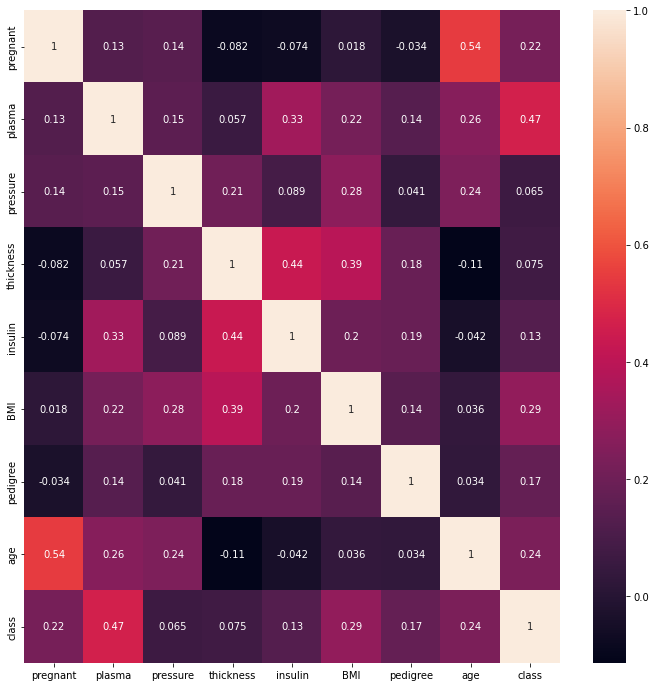

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), linecolor = 'white', annot = True)
plt.show()

In [ ]:
# 지도 학습 : 문제집과 정답지
# 비지도 학습 : 문제집 -> 여기에는 두가지 정답이 있어 알아서 나눠

fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-12-23 05:31:51--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-12-23 05:31:51--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-12-23 05:31:52--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443..

In [ ]:
fruits.shape

(300, 100, 100)

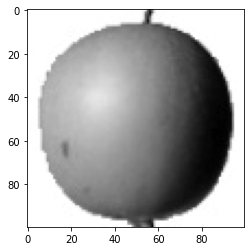

In [ ]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

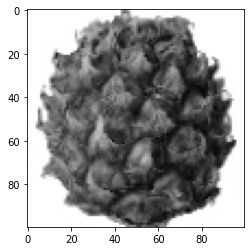

In [ ]:
plt.imshow(fruits[100], cmap = 'gray_r')
plt.show()

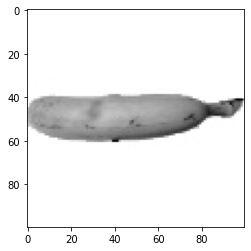

In [ ]:
plt.imshow(fruits[200], cmap = 'gray_r')
plt.show()

In [ ]:
apple = fruits[:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:].reshape(-1, 10000)

In [ ]:
apple.shape

(100, 10000)

In [ ]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

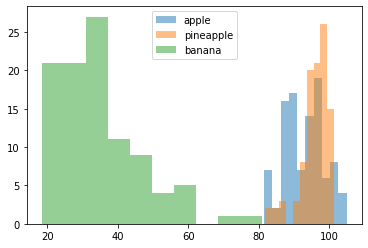

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

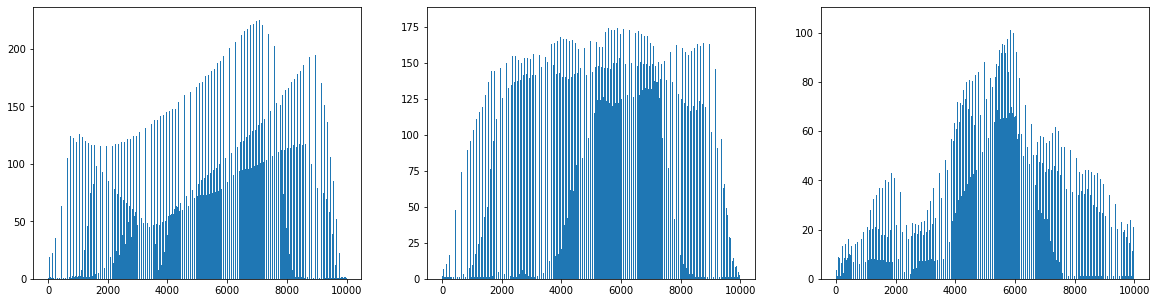

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

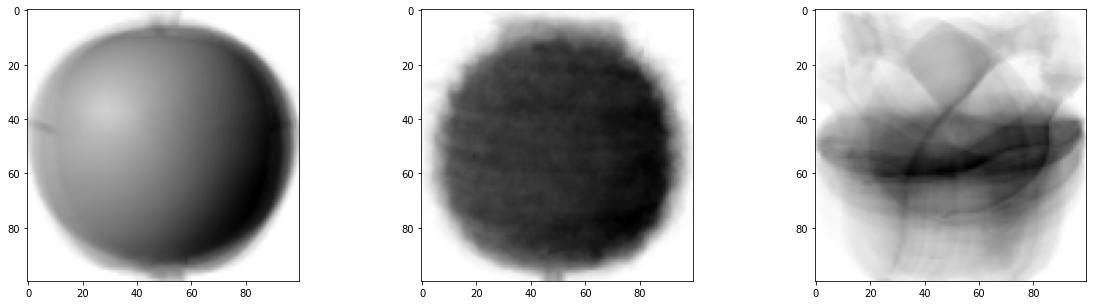

In [ ]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')

plt.show()

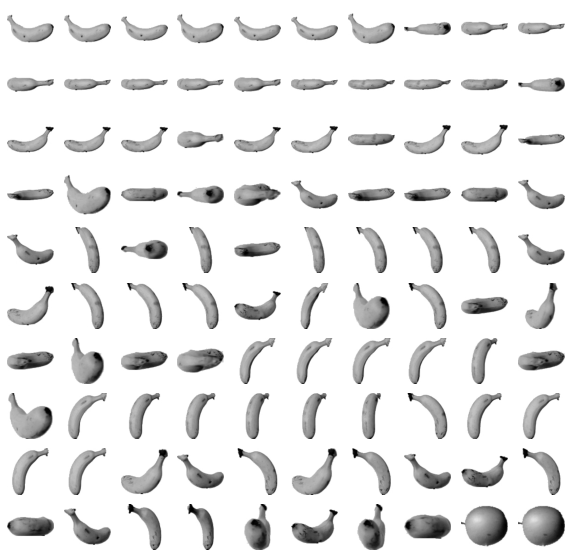

In [ ]:
# 300장에서 사과사진의 평균을 빼고 수치가 작은순으로 100개를 가져오면 그것은 모두 사과일것이다.

abs_diff = abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))

index = np.argsort(abs_mean)[:100] # 실제로 정렬하는것 인덱스

fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[index[i*10+j]], cmap = 'gray_r')
    axs[i,j].axis('off')
plt.show()

In [ ]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [ ]:
fruits2 = fruits.reshape(-1, 10000)
fruits2.shape

(300, 10000)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)
model.fit(fruits2)

KMeans(n_clusters=3)

In [ ]:
model.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
# 지도학습에 쓸 라벨링 필요해서

box = []

for n in range(2, 7):
  model = KMeans(n_clusters=n)
  model.fit(fruits2)
  box.append(model.inertia_)

box

[5856532545.983113,
 5074977316.088373,
 4653935025.546353,
 4307297394.622732,
 4034061903.6757364]

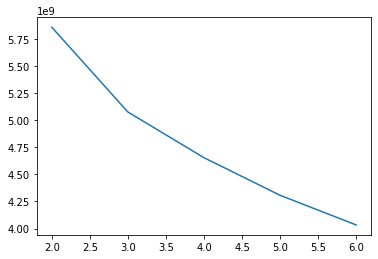

In [ ]:
plt.plot(range(2, 7), box)
plt.show()

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
test_target

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# 0 : 티셔츠
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌달
# 6 : 셔츠
# 7 : 스니커즈
# 8 : 가방
# 9 : 앵클 부츠

np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
np.unique(test_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

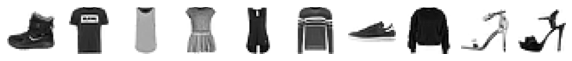

In [ ]:
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')

plt.show()

In [ ]:
train_scaled = train_input.reshape(-1, 28 * 28)
test_scaled = test_input.reshape(-1, 28 * 28)

In [ ]:
train_scaled.shape

(60000, 784)

In [ ]:
# 분류 모델 학습
train_scaled

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# 랜덤 포레스트 : %
# 인공신경망 : %
# 은닉층 딥러닝 : %
# CNN층 : %

# 이미지, 텍스트 : 그래픽카드
# 딥러닝으로 주식 : 노트북

# 데이터 잠깐 불러오고 학습 시킨 다음 기울기값

# 랜덤포레스트 : 87.6%

model = RandomForestClassifier()
model.fit(train_scaled, train_target)

RandomForestClassifier()

In [ ]:
model.score(test_scaled, test_target)

0.8763

In [ ]:
# K최근접이웃분류/회귀
# 결정트리/랜덤포레스트
# 비지도 학습
# 로지스틱회귀
# 선형회귀

